In [1]:
import simulation
import matplotlib.pylab as plt
import numpy as np

In [2]:
sim = simulation.MoriaSim('69002_p200.0_a600.0_r600.0_c8.15_z0', kicked=True)
sim.compute_cog()

loading simulation: 69002_p200.0_a600.0_r600.0_c8.15_z0
No sumfile found
Loading precomputed center of gravity for all the snapshots


In [3]:
sim

69002_p200.0_a600.0_r600.0_c8.15_z0: (95) <SimSnap "/home/michele/sim/MySimulations/Moria8Gyr_tidal/sim69002_p200.0_a600.0_r600.0_c8.15_z0/out/snapshot_0001" len=1871020>

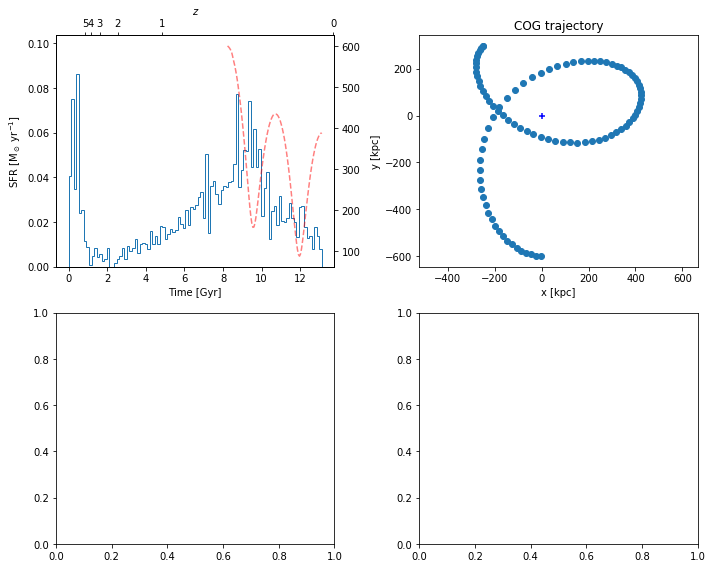

In [7]:
fig, ((ax_sfh, ax_cog), (ax_r, ax_v_circ)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sim.plot_sfh(ax_sfh)
ax_r1 = ax_sfh.twinx()
ax_r1.plot(sim.times, np.linalg.norm(sim.cog, axis=0), 'r--', alpha=0.5)
sim.plot_cog(ax_cog)
# p = profile()
fig.tight_layout()

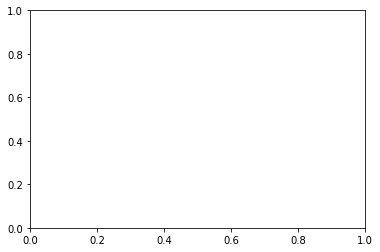